<a href="https://colab.research.google.com/github/MariPinas/Proj2AND/blob/main/Proj2AND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho II - Análise de Dados
#### Este trabalho tem como objetivo aplicar os principais algoritmos de classificação e regressão estudados em sala de aula, utilizando bases de dados reais. A proposta visa consolidar o conhecimento técnico e metodológico em Machine Learning, por meio da implementação prática das técnicas, avaliação dos resultados e interpretação crítica das descobertas.

# Base I - Desempenho Estudantil
## Descrição geral:
Contém dados educacionais sobre hábitos, rotinas, apoio familiar e fatores ambientais que ifluenciam o desempenho acadêmico dos estudantes.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DataScience-2025/03_desempenho_estudantil.csv", sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Análise Inicial da Base

#### 1.1 Tema e Contexto Empresarial
A base apresenta dados sobre o desempenho dos estudantes em conjunto a dados que podem estar relacionados a ele, dessa forma, é possível analisar e levantar hipóteses sobre estatísticas que podem afetar de forma positiva ou negativa o desempenho de um aluno.

#### 1.2 Dicionário de dados traduzido:
- Hours_Studied: Horas de estudo semanais.
- Attendance: Frequência (%) nas aulas.
- Parental_Involvement: Envolvimento dos pais (Baixo, Médio, Alto).
- Access_to_Resources: Acesso a recursos educacionais (Baixo, Médio, Alto).
- Extracurricular_Activities: Participação em atividades extracurriculares (Sim, Não).
- Sleep_Hours: Horas de sono por noite.
- Previous_Scores: Desempenho anterior.
- Motivation_Level: Motivação do aluno (Baixa, Média, Alta).
- Internet_Access: Acesso à internet (Sim, Não).
- Tutoring_Sessions: Sessões de reforço por mês.
- Family_Income: Renda familiar (Baixa, Média, Alta).
- Teacher_Quality: Qualidade dos professores (Baixa, Média, Alta).
- School_Type: Tipo de escola (Pública, Privada).
- Peer_Influence: Influência dos colegas (Positiva, Neutra, Negativa).
- Physical_Activity: Atividade física semanal (horas).
- Learning_Disabilities: Dificuldades de aprendizagem (Sim, Não).
- Parental_Education_Level: Escolaridade dos pais (Ensino Médio, Superior, Pós).
- Distance_from_Home: Distância de casa para a escola.
- Gender: Gênero.
- Exam_Score: Nota final no exame

#### Número de registros: 6607


## 2 - Limpeza dos dados


In [3]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
Parental_Education_Level,1.362192
Teacher_Quality,1.180566
Distance_from_Home,1.014076
Hours_Studied,0.000000
Access_to_Resources,0.000000
Parental_Involvement,0.000000
Attendance,0.000000
Extracurricular_Activities,0.000000
Motivation_Level,0.000000
Internet_Access,0.000000


In [6]:
#Remover dados nulos
df.dropna(inplace=True)

# Remover os dados incorretos (nota maior do que 100)
df.drop(df[df.Exam_Score > 100].index, axis=0, inplace = True)

print(f'As variáveis com mais dados faltantes após alteração, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes após alteração, em porcentagem (%), são:



,0
Hours_Studied,0.0
Attendance,0.0
Parental_Involvement,0.0
Access_to_Resources,0.0
Extracurricular_Activities,0.0
Sleep_Hours,0.0
Previous_Scores,0.0
Motivation_Level,0.0
Internet_Access,0.0
Tutoring_Sessions,0.0


## 3 - Padronização dos dados

#### ! Deve ser utilizado One Hot Encoding neste caso deste dataset:
#### Ele possui variaveis categóricas e os modelos LinearRegression, DecisionTreeRegressor, RandomForestRegressor, SVR NAO sabem lidar com esse tipo de variaveis que sao categorias.

In [7]:
# Selecionando as features (X) e o target (y) para regressão  e classificação

Xr = df.drop('Exam_Score', axis=1) # Todas as colunas, exceto 'Exam_Score'
yr = df['Exam_Score'] # A coluna 'Exam_Score' é o target para regressão

#------

Xc = df.drop('Family_Income', axis=1) # Todas as colunas, exceto 'Family_Income'
class_names = {"Low": 1, "Medium": 2, "High": 0} # Ordem alfabetica
yc = df['Family_Income'].map(class_names) # A coluna 'Family_Income' é o target para classificação.
#.map(class_names), estou fazendo tipo um label encoding so que manual, ele pega o dicionario class_names e vai substituir os valores com as chaves que eu criei

In [8]:
# ONE HOT ENCODING DOS DADOS
# Primeiro separei os dados categoricos para fazer a regressão (com o Family Income) e classificação(Sem o Family Income, pois é o target)
# Depois defini para cada um os dados numericos, claro que tive que tirar o Exam_score pois ele eh o target da regressão, mas para a classificação eu deixei ele
dados_Xr = ['Family_Income','Gender', 'Parental_Education_Level', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Teacher_Quality', 'School_Type', 'Peer_Influence','Learning_Disabilities','Distance_from_Home']
dados_Xc = ['Gender', 'Parental_Education_Level', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Teacher_Quality', 'School_Type', 'Peer_Influence','Learning_Disabilities','Distance_from_Home']
dados_num_Xr = ['Hours_Studied','Attendance','Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
dados_num_Xc = ['Hours_Studied','Attendance','Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

encoder = OneHotEncoder(sparse_output=False)
Xc_encoded = encoder.fit_transform(df[dados_Xc])
Xr_encoded = encoder.fit_transform(df[dados_Xr])

# Agora juntei o encoded + colunas numericas para fazer a padronização
Xr_final = np.concatenate([Xr_encoded, Xr[dados_num_Xr].values], axis=1)
Xc_final = np.concatenate([Xc_encoded, Xc[dados_num_Xc].values], axis=1)

In [9]:
scaler = StandardScaler()

Xr_scaled = scaler.fit_transform(Xr_final)
Xc_scaled = scaler.fit_transform(Xc_final)

## 4 - Separar treino e teste


In [10]:
# Splitando os dados em conjuntos de treino e teste para cada um
# Primeiro para Regressão
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr_scaled, yr, test_size=0.3, random_state=42
)
#-----
# Depois Classificacção
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc_scaled, yc, test_size=0.3, random_state=42
)

## 5 - Algoritmos de classificação

In [11]:
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=100), # hiperparâmetros dentro do padrão.
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=2), # Foi selecionado esses numeros para os hiperparâmetros max_depth e min_samples_leaf por não serem muito grandes mas mesmo assim manter um bom resultado.
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42), # padrão.
    "SVM": SVC(kernel='linear'), # A Acurácia melhorou ao utilizar o kernel linear do que rbf, o valor de C se manteve padrão, pois valores muito altos tendem a causar overfitting e menores a suavizar excessivamente a fronteira de decisão.
    "K-NN": KNeighborsClassifier(n_neighbors=5) # hiperparâmetro padrão visto em aula.
}

## 5.1 - Avaliação por modelo (Classificação)


 Regressão Logística
Acurácia : 0.60
Precisão : 0.47
Recall   : 0.50
F1-Score : 0.45


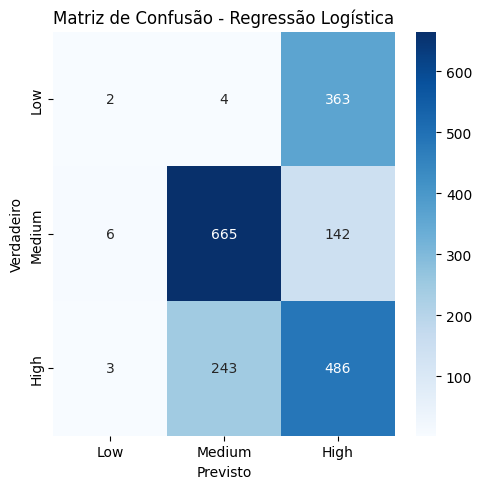


 Árvore de Decisão
Acurácia : 0.42
Precisão : 0.39
Recall   : 0.36
F1-Score : 0.33


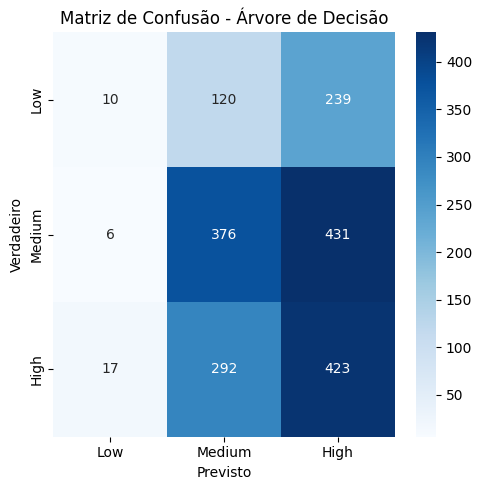


 Random Forest
Acurácia : 0.42
Precisão : 0.33
Recall   : 0.35
F1-Score : 0.32


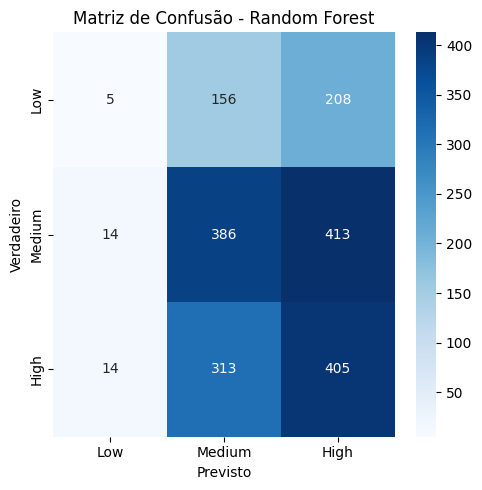


 SVM
Acurácia : 0.61
Precisão : 0.49
Recall   : 0.50
F1-Score : 0.46


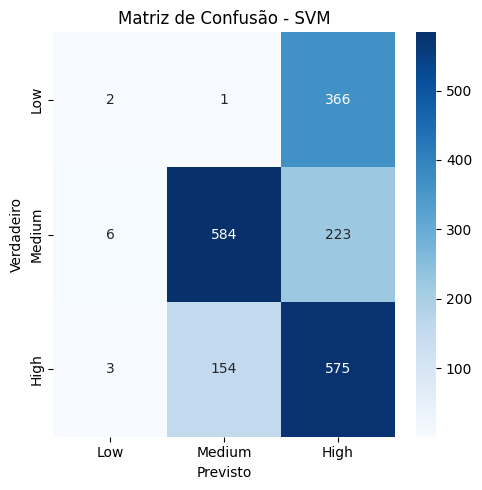


 K-NN
Acurácia : 0.35
Precisão : 0.32
Recall   : 0.32
F1-Score : 0.32


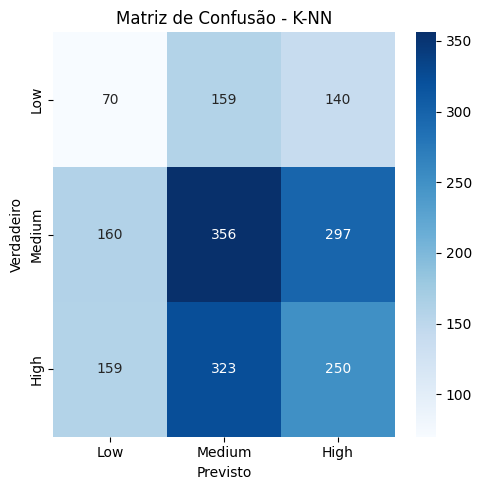

In [12]:
for nome, modelo in modelos.items():
    modelo.fit(Xc_train, yc_train)
    yc_pred = modelo.predict(Xc_test)

    acc = accuracy_score(yc_test, yc_pred)
    prec = precision_score(yc_test, yc_pred, average='macro', zero_division=0)
    rec = recall_score(yc_test, yc_pred, average='macro', zero_division=0)
    f1 = f1_score(yc_test, yc_pred, average='macro', zero_division=0)
    cm = confusion_matrix(yc_test, yc_pred)

    print(f"\n {nome}")
    print(f"Acurácia : {acc:.2f}")
    print(f"Precisão : {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-Score : {f1:.2f}")

    # Matriz de confusão
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

## 6 - Análises (Classificação)

### Análise primaria sem hiperparâmetros:
Podemos perceber que, com esse primeiro treinamento, utilizando somente os hiperparâmetros que aprendemos, os algoritmos foram no geral bem mal nessa parte de classificação. Somente na Regressão Logística atingiu uma acurácia de 60%, os outros modelos não conseguiram atingir nem 50% de acurácia. SVM atingiu uma precisão de apenas 28%.
### Análise secundária com hiperparâmetros:
Em alguns casos adicionar ou mudar valores dos hiperparâmetros resultou em mudanças nas métricas finais, em outros, o valor ou se manteve inalterado, ou a alteração foi baixa, o que não compensa o suposto gasto computacional, por isso foi retornado aos valores-base, isso aconteceu com o K-NN. Aumentar o número de n-vizinhos resultava em poucas alterações nas métricas finais, o que leva pensar que seria necessário alterar outros hiperparâmetros desse modelo para que ele melhore seus resultados. Por outro lado, o SVM apresentou mudanca significativa na acurácia, a qual era anteriormente a pior de todas, agora está em 61%, se tornando o modelo de maior acurácia. Isso se deu, pois foi alterado o valor do hiperparâmetros "kernel" de "rbf" para "linear". A árvore de regressão foi um dos casos em que a mudança foi baixa, o que mudou foi que agora coloquei os hiperparâmetros  max_depth=6, min_samples_leaf=2, os quais foram escolhidos por meio de testes e ajustes em cada treino, e esse foi o que se saiu menos pior diante dos outros.

---

## 7 - Algoritmos de Regressão

In [13]:
def avaliar_modelo(y_true, y_pred, nome="Modelo"): # Funcao para avaliar qual o RMSE dos modelos
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nome} - RMSE: {rmse:.2f}")

### 7.1 - Regressao Linear

In [56]:
modelo_lr = LinearRegression() # padrão
modelo_lr.fit(Xr_train, yr_train)

pred_lr = modelo_lr.predict(Xr_test)
avaliar_modelo(yr_test, pred_lr, "Regressão Linear")

Regressão Linear - RMSE: 1.81


### 7.2 - Árvore de Regressão

In [61]:
modelo_tree = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf=2) # Diminui 6 para 5 o hiperparâmetro max_depth (em comparacao ao de classificacao) e melhorou o resultado do RMSE (antes 2.66 com max_depth=6 e sem nenhum hiperparametro 3.74)
modelo_tree.fit(Xr_train, yr_train)

pred_tree = modelo_tree.predict(Xr_test)
avaliar_modelo(yr_test, pred_tree, "Árvore de Regressão")

Árvore de Regressão - RMSE: 2.59


### 7.3 - Random Forest Regressor

In [25]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42) # hiperparâmetros padrão
modelo_rf.fit(Xr_train, yr_train)

pred_rf = modelo_rf.predict(Xr_test)
avaliar_modelo(yr_test, pred_rf, "Random Forest")

Random Forest - RMSE: 2.19


### 7.4 - Support Vector Regressor (SVR)

In [17]:
modelo_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100)) # hiperparâmetros padrão - não foi possivel testar o linear no kernel por conta do tempo de execução muito elevado
modelo_svr.fit(Xr_train, yr_train)

pred_svr = modelo_svr.predict(Xr_test)
avaliar_modelo(yr_test, pred_svr, "SVR")

SVR - RMSE: 2.12


## 7.5 -  Avaliação por modelo (Regressão)...

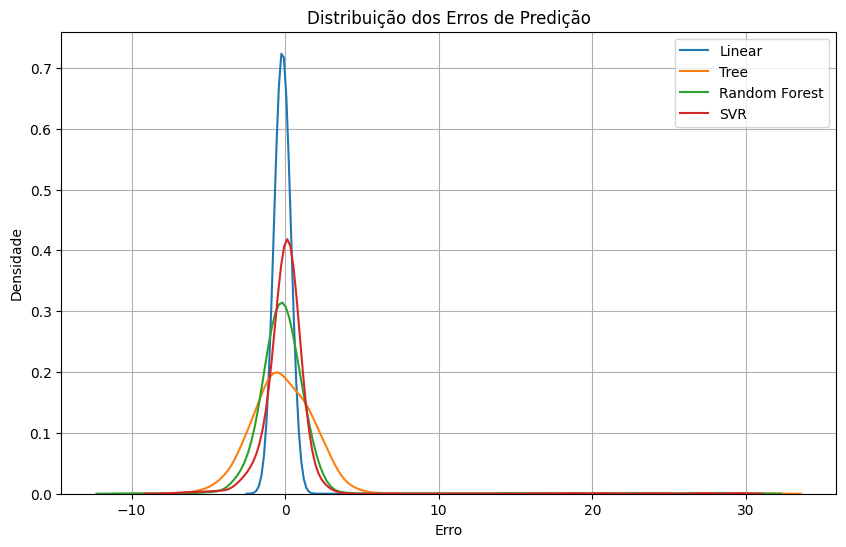

In [63]:
plt.figure(figsize=(10, 6))
sns.kdeplot(yr_test - pred_lr, label="Linear")
sns.kdeplot(yr_test - pred_tree, label="Tree")
sns.kdeplot(yr_test - pred_rf, label="Random Forest")
sns.kdeplot(yr_test - pred_svr, label="SVR")

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()

## Análises (REGRESSÃO)
### Análise primária sem hiperparâmetros
#### O resultado do RMSE dos modelos no geral não foi horrível, com maior erro de 3.74 na árvore de regressão, que pode ser visualizado no gráfico acima, mas ainda surge a abertura para melhoria de alguns destes valores. Nesse momento, o menor erro foi o Linear Regression com apenas 1.81, como aponta o gráfico.

### Análise secundária com hiperparâmetros
#### Foi adicionado ou alterado alguns hiperparâmetros na árvore de regressão e obteve otimas melhorias, chegando próximo aos outros modelos, agora com RMSE de 2.59, já diminuiu bastante em comparação ao anterior. O que mudou foram os parâmetros max_depth e min_samples_leaf. Foi colocado o número 6 no max_depth, o que já tinha melhorado, mas com o número 5 de fato diminuiu mais um pouco o erro, sendo o escolhido para manter o resultado desta análise. Em relação ao SVR, não foi possível testar com o kernel='linear' ja que o treinamento ultrapassou 20min de execução, se tornando inviável. Mesmo com as alterações, o algoritmo Tree ainda foi pior em comparação aos demais, como pode ser visto no gráfico.

# Conclusão

A base apresenta dados muito concisos e com poucos erros. ela demonstra ser uma boa fonte para análise das variáveis que mais impactam o desempenho dos alunos. Com ela eh possivel treinar modelos tanto de regressao, quanto de classificacao. Assim, análises realizadas com diversos modelos de machine learning apresentaram dados bastante distintos entre si.
Utilizei como variavel target para regressao o Exam_Score, que eh um dado numerico e Family_Income como target para classificacao, pois se trata de um dado categorico, entao por isso foi necessario criar variaveis separadas para manter a consistencia e evitar erros no codigo. Podem existir formas mais simples e rapidas de fazer a separacao e tratamento dos dados para depois treinar, mas foi a forma que eu consegui fazer, apresentando bons resultados e nenhum erro.
Com esse segundo trabalho, foi possivel ver na pratica que uma boa escolha dos hiperparametros em um modelo, traz enorme diferenca nos resultados, por isso eh uma das partes mais dificeis em treinar o modelo. Dessa forma, foi possivel observar diferencas como nas analises apresentadas. O modelo de classificacao que eu escolheria para ser o definitivo para essa base seria o SVM, por apresentar maior acuracia e todas as outras metricas como F1-Score, Precisao e Recall foram as melhores, mas a Regressao Logistica ficou bem proximo, tambem podendo ser uma otima opcao. Agora, para Regressao, o modelo Linear Regression foi o melhor, com RMSE de 1.81.